# TÜBİTAK 2204-D Lise Öğrencileri İklim Değişikliği Araştırma Projeleri Yarışması 2022
# Kuraklık Tespitine Yapay Zeka ile Bakış: Konya Kapalı Havzası Kuraklık Tahmini
Çalışmamızın kodları bu sayfada mevcuttur.

Bu sayfada;

* Önceki kodlarda yapılmış havza sınırlarına göre kırpılmış uydu görüntülerinin incelenmesini,
* kırpılan görüntülerin birleştirilmesini ve mozaik halinde kaydedilmesini göreceksiniz.

# Kütüphaneler
earthpy ve rioxarray kütüphaneleri Kaggle'da yüklü olmadığı için ortamımıza yüklememiz gerekmektedir.

In [1]:
!pip install earthpy
!pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - \ | / - done
  Preparing metadata (pyproject.toml) ... - \ | / - done
  Created wheel for rioxarray: filename=rioxarray-0.9.1-py3-none-any.whl size=54609 sha256=756ca92702c2763e506b24bff2c2d584a67fc77c9c25d9be3bbce0d0286c67a3
  Stored in directory: /root/.cache/pip/wheels/07/da/9e/1cc57b2e7a29a206893db83e984a341e2e94378263e0798229
Successfully built rioxarray


In [2]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Uydu Görüntülerinin İçeri Aktarılması
​Önceki sayfada havza sınırlarına göre kırpılan görüntüler kullanılacaktır.

In [3]:
c2013_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l89-2/Year_2013"
c2014_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l89-2/Year_2014"
c2015_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l89-2/Year_2015"
c2016_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l89-2/Year_2016"
c2017_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l89-1/Year_2017"
c2018_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l89-1/Year_2018"
c2019_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l89-1/Year_2019"
c2020_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l89-1/Year_2020"
c2021_path = "../input/2204-d-havza-s-n-rlar-na-k-rpma-l89-1/Year_2021"

cpath_list = [c2013_path, c2014_path, c2015_path, c2016_path, c2017_path,
              c2018_path, c2019_path, c2020_path, c2021_path]

In [4]:
c2013 = os.listdir(c2013_path)
c2014 = os.listdir(c2014_path)
c2015 = os.listdir(c2015_path)
c2016 = os.listdir(c2016_path)
c2017 = os.listdir(c2017_path)
c2018 = os.listdir(c2018_path)
c2019 = os.listdir(c2019_path)
c2020 = os.listdir(c2020_path)
c2021 = os.listdir(c2021_path)
clipped_year = [c2013, c2014, c2015, c2016, c2017, c2018, c2019, c2020, c2021]

In [5]:
c2014

['LC08_L2SP_177033_20140813_20200911_02_T1_SR_B4.TIF',
 'LC08_L2SP_176033_20141110_20200910_02_T1_SR_B4.TIF',
 'LC08_L2SP_177033_20140712_20200911_02_T1_SR_B5.TIF',
 'LC08_L2SP_176033_20140822_20200911_02_T1_SR_B5.TIF',
 'LC08_L2SP_176033_20141110_20200910_02_T1_SR_B5.TIF',
 'LC08_L2SP_178034_20141007_20200910_02_T1_SR_B4.TIF',
 'LC08_L2SP_177034_20140930_20200911_02_T1_SR_B4.TIF',
 'LC08_L2SP_176034_20141110_20200910_02_T1_SR_B4.TIF',
 'LC08_L2SP_178034_20140703_20200911_02_T1_SR_B4.TIF',
 'LC08_L2SP_177034_20140712_20200911_02_T1_SR_B5.TIF',
 'LC08_L2SP_177034_20140626_20200911_02_T1_SR_B4.TIF',
 'LC08_L2SP_176033_20140822_20200911_02_T1_SR_B4.TIF',
 'LC08_L2SP_177034_20140930_20200911_02_T1_SR_B5.TIF',
 'LC08_L2SP_177033_20140813_20200911_02_T1_SR_B5.TIF',
 'LC08_L2SP_177034_20140626_20200911_02_T1_SR_B5.TIF',
 'LC08_L2SP_178034_20140703_20200911_02_T1_SR_B5.TIF',
 'LC08_L2SP_176033_20141009_20200910_02_T1_SR_B5.TIF',
 'LC08_L2SP_178034_20141007_20200910_02_T1_SR_B5.TIF',
 'LC08_L2S

# Uydu Görüntülerinin Ayrıştırılması
Havzada bitki örtüsü mevsimden mevsime değişiklik gösterebilir. Bunu önlemek için çalışmada aynı mevsimlere ait görüntüleri kullanmamız gerekmektedir. Veri seti incelendiğinde en çok yaz ve sonbahar görüntülerinin olduğu görülmektedir. Bu yüzden çalışmada sadece yaz ve sonbahar aylarına çekilmiş görüntüler kullanılacaktır.

In [6]:
months = ("06", "07", "08", "09" ,"10", "11")
for year in clipped_year:
    for band in year:
        if band[21:23] in months:
            continue
        else:
            year.remove(band)

In [7]:
c2014

['LC08_L2SP_177033_20140813_20200911_02_T1_SR_B4.TIF',
 'LC08_L2SP_176033_20141110_20200910_02_T1_SR_B4.TIF',
 'LC08_L2SP_177033_20140712_20200911_02_T1_SR_B5.TIF',
 'LC08_L2SP_176033_20140822_20200911_02_T1_SR_B5.TIF',
 'LC08_L2SP_176033_20141110_20200910_02_T1_SR_B5.TIF',
 'LC08_L2SP_178034_20141007_20200910_02_T1_SR_B4.TIF',
 'LC08_L2SP_177034_20140930_20200911_02_T1_SR_B4.TIF',
 'LC08_L2SP_176034_20141110_20200910_02_T1_SR_B4.TIF',
 'LC08_L2SP_178034_20140703_20200911_02_T1_SR_B4.TIF',
 'LC08_L2SP_177034_20140712_20200911_02_T1_SR_B5.TIF',
 'LC08_L2SP_177034_20140626_20200911_02_T1_SR_B4.TIF',
 'LC08_L2SP_176033_20140822_20200911_02_T1_SR_B4.TIF',
 'LC08_L2SP_177034_20140930_20200911_02_T1_SR_B5.TIF',
 'LC08_L2SP_177033_20140813_20200911_02_T1_SR_B5.TIF',
 'LC08_L2SP_177034_20140626_20200911_02_T1_SR_B5.TIF',
 'LC08_L2SP_178034_20140703_20200911_02_T1_SR_B5.TIF',
 'LC08_L2SP_176033_20141009_20200910_02_T1_SR_B5.TIF',
 'LC08_L2SP_178034_20141007_20200910_02_T1_SR_B5.TIF',
 'LC08_L2S

Aynı yıla ait olan uydu görüntülerini birleştirmek için band4 ve band5 olmalarına göre ayrıştırıyoruz.

In [8]:
b4list2013 = []
b5list2013 = []

b4list2014 = []
b5list2014 = []

b4list2015 = []
b5list2015 = []

b4list2016 = []
b5list2016 = []

b4list2017 = []
b5list2017 = []

b4list2018 = []
b5list2018 = []

b4list2019 = []
b5list2019 = []

b4list2020 = []
b5list2020 = []

b4list2021 = []
b5list2021 = []

b4list = [b4list2013, b4list2014, b4list2015, b4list2016, b4list2017,
          b4list2018, b4list2019, b4list2020, b4list2021]
b5list = [b5list2013, b5list2014, b5list2015, b5list2016, b5list2017,
          b5list2018, b5list2019, b5list2020, b5list2021]

In [9]:
def whichband(b4lst, b5lst, lst):
    for i in lst:
        if i.endswith("B4.TIF"):
            b4lst.append(i)
        elif i.endswith("B5.TIF"):
            b5lst.append(i)
        else:
            print("Atlandı")
            
    b4lst.sort()
    b5lst.sort()

In [10]:
for i in range(len(clipped_year)):
    whichband(b4list[i], b5list[i], clipped_year[i])

In [11]:
b4list[0]

['LC08_L2SP_176033_20130803_20200912_02_T1_SR_B4.TIF',
 'LC08_L2SP_176033_20131022_20200912_02_T1_SR_B4.TIF',
 'LC08_L2SP_176034_20130803_20200912_02_T1_SR_B4.TIF',
 'LC08_L2SP_177033_20130623_20200912_02_T1_SR_B4.TIF',
 'LC08_L2SP_177033_20130709_20200912_02_T1_SR_B4.TIF',
 'LC08_L2SP_177033_20130725_20200912_02_T1_SR_B4.TIF',
 'LC08_L2SP_177033_20130810_20200912_02_T1_SR_B4.TIF',
 'LC08_L2SP_177033_20130826_20200913_02_T1_SR_B4.TIF',
 'LC08_L2SP_177033_20130911_20200913_02_T1_SR_B4.TIF',
 'LC08_L2SP_177034_20130623_20200912_02_T1_SR_B4.TIF',
 'LC08_L2SP_177034_20130725_20200912_02_T1_SR_B4.TIF',
 'LC08_L2SP_177034_20130810_20200912_02_T1_SR_B4.TIF',
 'LC08_L2SP_177034_20130911_20200913_02_T1_SR_B4.TIF',
 'LC08_L2SP_177034_20130927_20200913_02_T1_SR_B4.TIF',
 'LC08_L2SP_177034_20131130_20200912_02_T1_SR_B4.TIF']

# Kırpılan Görüntülerin Birleştirilmesi
Görüldüğü gibi kırpılan görüntüler havzanını belli bir kısmını göstermektedir. Bir yıla ait görüntüleri birleştirdiğimiz zaman bütün havzaya ait görüntüler elde ederiz.

In [12]:
os.mkdir("./Band4")
os.mkdir("./Band5")

In [13]:
def merging(data, ypath, wband, year):
    arrays = []
    for i in data:
        path = os.path.join(ypath, i)
        band = rxr.open_rasterio(path, masked=True).squeeze()
        arrays.append(band)
    
    merged = merge_arrays(arrays)
    if wband == "_B4.TIF":
        outpath = os.path.join("./Band4", "Havza_"+str(year)+"_B4.TIF")
    elif wband == "_B5.TIF":
        outpath = os.path.join("./Band5", "Havza_"+str(year)+"_B5.TIF")
    merged.rio.to_raster(outpath)

Fonksiyona göre kırpılmış görüntüdeki raster şeklindeki değerler açılır ve bu değerler arrays listesine eklenir. Bu her bir görüntü için tekrar edilir. Daha sonra liste içindeki değerler birleştirilir ve en sonunda birleştirilen değer döndürülür. Bu şekilde bütün havzaya ait griddlenmiş değerler bir araya getirilir.

In [14]:
year = 2013
for i in range(len(b4list)):
    merging(b4list[i], cpath_list[i], "_B4.TIF", year)
    merging(b5list[i], cpath_list[i], "_B5.TIF", year)

    print("Yıl {} yapıldı.".format(str(year)))
    year+=1
    time.sleep(2)

Yıl 2013 yapıldı.
Yıl 2014 yapıldı.
Yıl 2015 yapıldı.
Yıl 2016 yapıldı.
Yıl 2017 yapıldı.
Yıl 2018 yapıldı.
Yıl 2019 yapıldı.
Yıl 2020 yapıldı.
Yıl 2021 yapıldı.


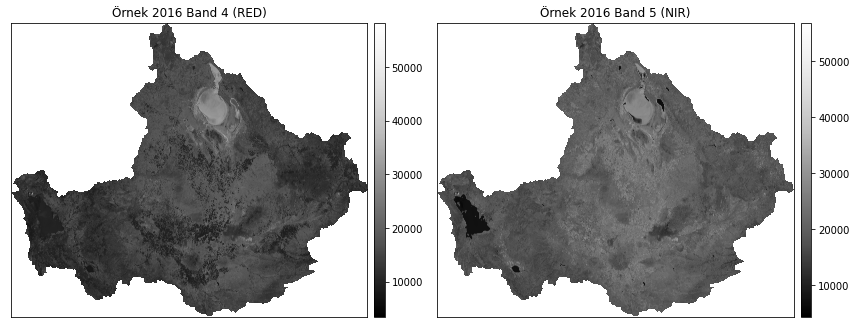

In [15]:
dene4 = rxr.open_rasterio("./Band4/Havza_2016_B4.TIF", masked = True).squeeze()
dene5 = rxr.open_rasterio("./Band5/Havza_2016_B5.TIF", masked = True).squeeze()
deneler = np.array([dene4, dene5])
ep.plot_bands(deneler, cols = 2, title = ["Örnek 2016 Band 4 (RED)", "Örnek 2016 Band 5 (NIR)"])
plt.show()

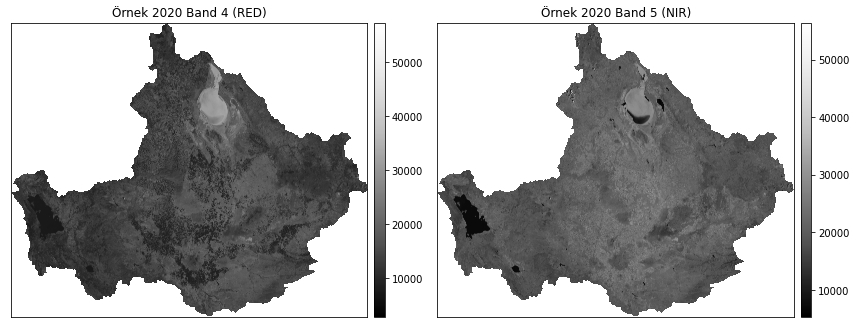

In [16]:
dene4 = rxr.open_rasterio("./Band4/Havza_2020_B4.TIF", masked = True).squeeze()
dene5 = rxr.open_rasterio("./Band5/Havza_2020_B5.TIF", masked = True).squeeze()
deneler = np.array([dene4, dene5])
ep.plot_bands(deneler, cols = 2, title = ["Örnek 2020 Band 4 (RED)", "Örnek 2020 Band 5 (NIR)"])
plt.show()